# <div style="text-align: center">Machine Learning and Artificial Intelligence</div>

<div style="text-align: center"> <sub>ENCN404 - Modern Modelling Practices in Civil Engineering</sub></div>

$\,$

<div style="text-align: center"> University of Canterbury </div>

$\,$

<img src="img/ml.png" alt="Drawing" style="width: 600px;"/>

### Notebook instructions

Run cells containing code by clicking on them and hitting **Ctrl+Enter** or by Cell>Run Cells in the drop-down menu.

For queries, contact the course instructor or notebook author (David Dempsey)

#### Contents
*Explorative AI*
1. Data Exploration with Pandas
2. Feature Engineering
3. Unsupervised Learning and Clustering
4. Hypothesis Testing

*Predictive AI*

5. Supervised Learning
6. Learning Algorithms
7. Performance Metrics
8. Cross Validation

*Generative AI*

9. AI-assisted coding


# Explorative AI

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1. Data Exploration with Pandas

Work through the examples below during the lecture

### 1.1 DataFrame

In [2]:
# The most important object is the DataFrame. Think of this like a table in a spreadsheet.
data={'time': [30, 60, 90, 120, 150], 'rainfall': [4, 11, 32, 8, 0], 'runoff': [0, 0, 1.7, 8.6, 3.1]}

# create the dataframe from a dictionary of data
df=pd.DataFrame(data)

# look at the dataframe
df.head()

,time,rainfall,runoff
0,30,4,0.0
1,60,11,0.0
2,90,32,1.7
3,120,8,8.6
4,150,0,3.1


In [3]:
# display the column names
df.columns

Index(['time', 'rainfall', 'runoff'], dtype='object')

In [4]:
# display the row and column counts
df.shape

(5, 3)

### 1.2 Index

In [5]:
# Dataframes have indices. These are like the indices of an array or list, e.g., 0, 1, 2, … -1. 
# The indices populate by default in the Python convention. They can be accessed from the 'index' attribute.
df.index

RangeIndex(start=0, stop=5, step=1)

In [6]:
# Indices don't have to be integers. We can change them to something else. 
# A popular choice is some kind of measure of time, in which case we are working with time series data.
df.set_index('time', inplace=True)
df.head()

,rainfall,runoff
time,,
30,4,0.0
60,11,0.0
90,32,1.7
120,8,8.6
150,0,3.1


In [7]:
# We can use indices to get access to parts of the dataframe.
print(df.loc[30])
print(df.loc[90,'rainfall'])
print(df.loc[120:,'runoff'])

rainfall    4.0
runoff      0.0
Name: 30, dtype: float64
32
time
120    8.6
150    3.1
Name: runoff, dtype: float64


### 1.3 Series

In [8]:
# extract a series (one column) from the larger dataframe
rain=df['rainfall']

# summarize aspects of the series
print(rain.max())             # or min, mean, std, sum
print(rain.describe())
print(rain.unique())          # sort_values, value_counts

32
count     5.0000
mean     11.0000
std      12.4499
min       0.0000
25%       4.0000
50%       8.0000
75%      11.0000
max      32.0000
Name: rainfall, dtype: float64
[ 4 11 32  8  0]


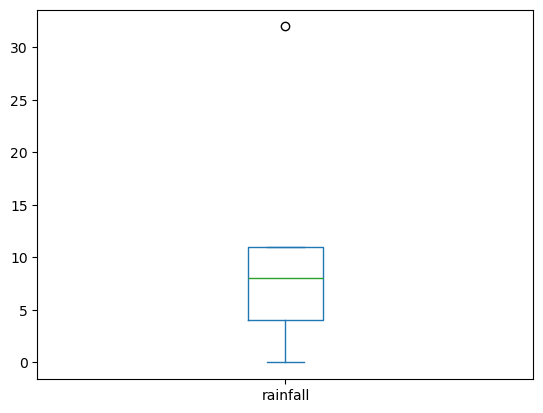

In [9]:
# With matplotlib, we can also generate plots
rain.plot(kind='box')   # or line, box, pie…
plt.show()

### 1.4 Other operations

In [10]:
# We'll use the dataframe as a variable on which to do calculations (like a spreadsheet). 
# For example, calculate new columns
df['rnf_rnd']=df['runoff'].round()
df.head()

,rainfall,runoff,rnf_rnd
time,,,
30,4,0.0,0.0
60,11,0.0,0.0
90,32,1.7,2.0
120,8,8.6,9.0
150,0,3.1,3.0


In [11]:
# or calculate a summary row
df.max()

rainfall    32.0
runoff       8.6
rnf_rnd      9.0
dtype: float64

In [12]:
# We can write dataframes out to files, and read them back in again. We'll generally use CSV files.
df.to_csv('rainfall.csv')
df2=pd.read_csv('rainfall.csv')
df2.head()

,time,rainfall,runoff,rnf_rnd
0,30,4,0.0,0.0
1,60,11,0.0,0.0
2,90,32,1.7,2.0
3,120,8,8.6,9.0
4,150,0,3.1,3.0


### 1.5 Rolling window calculations

In [13]:
# rolling window calculations are a useful series operation
df['avg_rain']=df['rainfall'].rolling(3).mean()
df.head()

,rainfall,runoff,rnf_rnd,avg_rain
time,,,,
30,4,0.0,0.0,NaN
60,11,0.0,0.0,NaN
90,32,1.7,2.0,15.666667
120,8,8.6,9.0,17.000000
150,0,3.1,3.0,13.333333


In [14]:
# rolling() can be chained with apply() to any function you can think of, e.g., sum of squares
def sum_of_squares(x):
    return np.sum(x**2)
df['ss_runoff2']=df['runoff'].rolling(3).apply(sum_of_squares)
df.head()

,rainfall,runoff,rnf_rnd,avg_rain,ss_runoff2
time,,,,,
30,4,0.0,0.0,NaN,NaN
60,11,0.0,0.0,NaN,NaN
90,32,1.7,2.0,15.666667,2.89
120,8,8.6,9.0,17.000000,76.85
150,0,3.1,3.0,13.333333,86.46


### 1.6 Grouping and sorting

In [15]:
# let's look now at some categorical data in buildings.csv
df=pd.read_csv('buildings.csv')
df.set_index('Building', inplace=True)
df

,Type,Area,Cost
Building,,,
A,Commercial,120,180000
B,Industrial,250,220000
C,Residential,150,120000
D,Commercial,300,600000
E,Industrial,200,300000
F,Residential,100,150000
G,Commercial,350,400000
H,Industrial,180,250000
I,Residential,140,200000


In [16]:
# we can sort on a particular column
df.sort_values('Cost', ascending=False)

# (Note: sort_values() OUTPUTS a new sorted dataframe. It does not sort the original
#  dataframe unless you set inplace=True)

,Type,Area,Cost
Building,,,
D,Commercial,300,600000
J,Residential,400,500000
G,Commercial,350,400000
E,Industrial,200,300000
H,Industrial,180,250000
B,Industrial,250,220000
I,Residential,140,200000
A,Commercial,120,180000
F,Residential,100,150000


In [17]:
# we can group according to a category and calculate summaries of those groups
df.groupby('Type').median()

,Area,Cost
Type,,
Commercial,300.0,400000.0
Industrial,200.0,250000.0
Residential,145.0,175000.0


### 1.7 Outliers

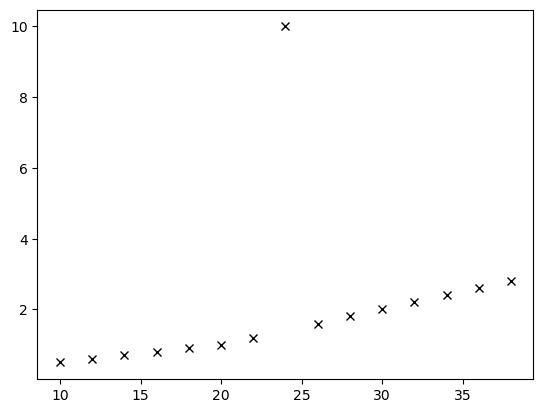

In [18]:
# we can use pandas to find and replace outliers, for example in the data below
df=pd.DataFrame({'disp': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 10, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8], 'load': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]}) 
plt.plot(df['load'], df['disp'], 'kx'); plt.show()

In [19]:
# calculate a new column that is the z-score (deviation from the mean)
df['zsc']=(df['disp']-df['disp'].mean())/df['disp'].std()
df

,disp,load,zsc
0,0.5,10,-0.677461
1,0.6,12,-0.634402
2,0.7,14,-0.591343
3,0.8,16,-0.548284
4,0.9,18,-0.505225
5,1.0,20,-0.462166
6,1.2,22,-0.376048
7,10.0,24,3.413142
8,1.6,26,-0.203812
9,1.8,28,-0.117695


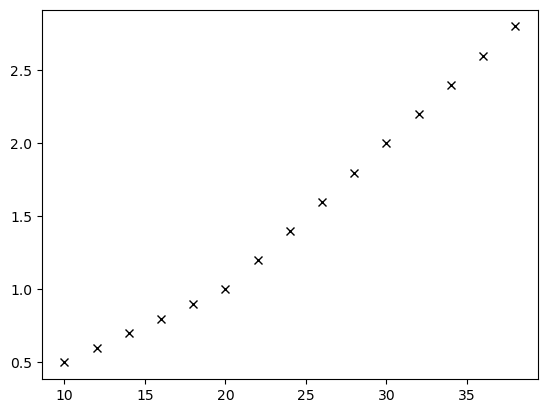

In [20]:
# find outliers based on large absolute zscores
no_outliers=df['disp'].where(df['zsc'].abs()<3)

# replace the outliers with linear interpolation
df['disp']=no_outliers.interpolate(method='linear') 
plt.plot(df['load'], df['disp'], 'kx'); plt.show()

## 2. Feature Engineering

Work through the examples below in the lecture

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 2.1 Standardization and normalization

Some ML algorithms struggle with data that have order of magnitude different scales and ranges. Z-score standardization transforms these to distributions with zero mean and unit standard deviation.

In [22]:
# Displacement data and calculated strain
u = np.array([0.011, 0.012, 0.014, 0.022, 0.045, 0.123, 0.190, 0.231, 0.245, 0.249, 0.251])   # 2.5 m samples
e = np.diff(u)/2.5  # strain
df = pd.DataFrame({'displacement': u[:-1], 'strain': e})
df

,displacement,strain
0,0.011,0.0004
1,0.012,0.0008
2,0.014,0.0032
3,0.022,0.0092
4,0.045,0.0312
5,0.123,0.0268
6,0.190,0.0164
7,0.231,0.0056
8,0.245,0.0016
9,0.249,0.0008


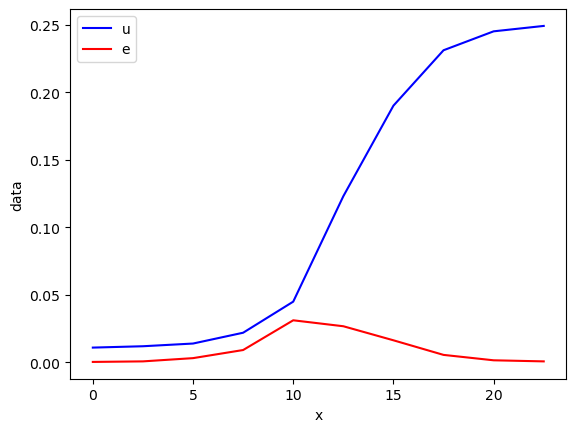

In [23]:
# note how the blue displacement dominates the plot, whereas red strain is less distinctive
# this is because of their different ranges of values
x=np.arange(len(e))*2.5
plt.plot(x, df['displacement'], 'b-', label='u')
plt.plot(x, df['strain'], 'r-', label='e')
plt.gca().set_xlabel('x'); plt.gca().set_ylabel('data')
plt.legend()
plt.show()

In [24]:
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale the data to a unit normal distribution
scaled_data = scaler.fit_transform(df[['displacement', 'strain']])
scaled_df = pd.DataFrame(scaled_data, columns=['scaled_displacement', 'scaled_strain'])
scaled_df

,scaled_displacement,scaled_strain
0,-1.036312,-0.850802
1,-1.026270,-0.813811
2,-1.006186,-0.591862
3,-0.925852,-0.036991
4,-0.694891,1.997535
5,0.088368,1.590630
6,0.761167,0.628854
7,1.172880,-0.369914
8,1.313465,-0.739828
9,1.353632,-0.813811


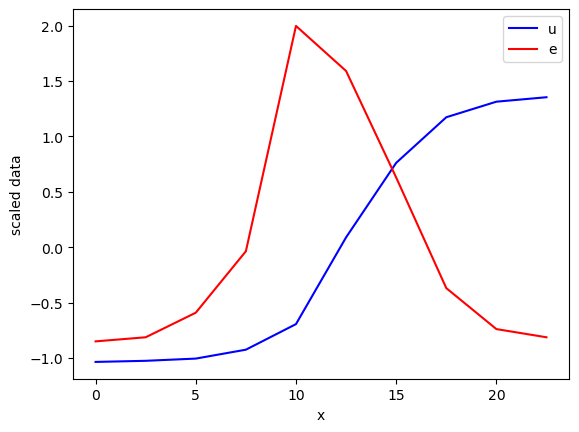

In [25]:
# see how shapes of the data are preserved, but they have been rescaled to have similar range and centre
plt.plot(x, scaled_df['scaled_displacement'], 'b-', label='u')
plt.plot(x, scaled_df['scaled_strain'], 'r-', label='e')
plt.gca().set_xlabel('x'); plt.gca().set_ylabel('scaled data')
plt.legend()
plt.show()

### 2.2 One-hot encoding

Convert categorical data into binary input features, e.g., commercial/not commercial, residential/not residential. This feature is easier for some ML algorithms to work with.

In [26]:
from sklearn.preprocessing import OneHotEncoder
df = pd.DataFrame({'Type': ['Resid', 'Comm', 'Indus', 'Resid', 'Indus', 'Comm']})
df

,Type
0,Resid
1,Comm
2,Indus
3,Resid
4,Indus
5,Comm


In [28]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Fit and transform the data
encoded_data = encoder.fit_transform(df[['Type']])
encoded_data

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [30]:
# Create a new dataframe with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Type']))
# Concatenate the original and encoded dataframes
result_df = pd.concat([df, encoded_df], axis=1)
result_df

,Type,Type_Comm,Type_Indus,Type_Resid
0,Resid,0.0,0.0,1.0
1,Comm,1.0,0.0,0.0
2,Indus,0.0,1.0,0.0
3,Resid,0.0,0.0,1.0
4,Indus,0.0,1.0,0.0
5,Comm,1.0,0.0,0.0


### 2.3 Rolling window features

These are constructed from **WINDOWS** that slide over time series data. A new feature value is calculated by applying some **FUNCTION** to the data contained within the window. When the window moves on, the function is reapplied and a new feature value is calculated. 

These features highlight certain characteristics of the data by supressing noise components not related to that characteristic.

In this example, we have a time series of traffic density at an intersection over two years. The change over time is complex, with a strong first-order trend, overprinted by second-order patterns.

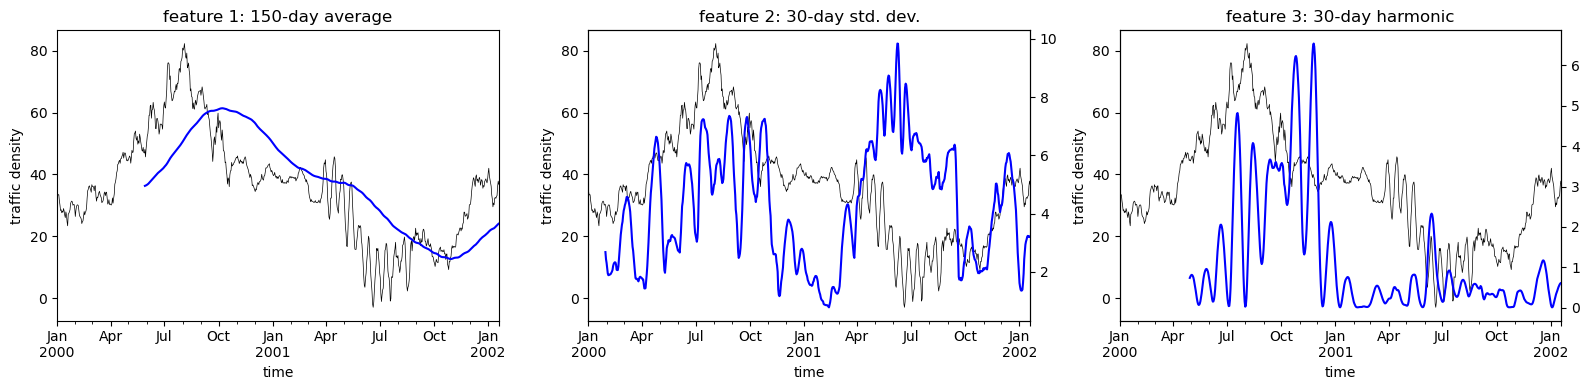

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in some data
df=pd.read_csv('traffic_data.csv',parse_dates=[0]).set_index('time')
ts=df['density']

# plot the raw data
f,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(16,4))
for ax in [ax1,ax2,ax3]:
    ts.plot(style='k-', lw=0.5, ax=ax, label='raw data')

# Calculate a 150-day rolling mean
Tm=150      
df['density_mean']=ts.rolling(window=Tm).mean()
df['density_mean'].plot(style='b',ax=ax1)

# Calculate a 30-day rolling standard deviation
Tsd=30
df['density_std']=ts.rolling(window=Tsd).std()
df['density_std'].plot(style='b', ax=ax2.twinx())

# Calculate a rolling X-day harmonic 
def rolling_fft(x, ti):
    fft = np.fft.fft(x)/len(x)
    psd = np.abs(fft)**2/2
    period_of_interest = ti
    ts=1./(np.fft.fftfreq(len(x)))
    i=np.argmin(abs(ts-ti))
    return psd[i]

Ti=30   # harmonic (days)
ts.rolling(window=120).apply(rolling_fft, args=(Ti,)).plot(style='b', ax=ax3.twinx())

for ax in [ax1,ax2,ax3]:
    ax.set_ylabel('traffic density')
ax1.set_title(f'feature 1: {Tm:d}-day average')
ax2.set_title(f'feature 2: {Tsd:d}-day std. dev.')
ax3.set_title(f'feature 3: {Ti:d}-day harmonic')
plt.tight_layout()
plt.show()

In [32]:
from encn404 import rolling_window
rolling_window()
# run this cell and answer the questions below:
# For feature 1, slide the WINDOW length from 150 to 20 days. How does the feature change?
# Set the SAME window length for features 1 and 2. How are they different?
# For feature 3, what information is it extracting?
# Which feature extracts the first-order trend?
# Which feature identifies second-order characteristics that overprint the trend?
# which of these first- or second-order characteristics are signal and which are noise?

### 2.4 Interaction features

We seek to **combine** different types of data together into new features that may better capture characteristics of the covarying data. For example, the product of two data types. Or a ratio.

In this example, we will suppose that we have strength measurements for concrete samples with different amounts of water and cement, and that have been aged for different lengths of time. Data columns are then Cement (C), Water (W) and Age (A), whereas interaction features could be **ratios** or **products**, e.g., C/W (cement-water ratio), C\*A (cement-age product).

       Cement       Water         Age      Strength
0  275.819461  154.659010  229.311383  2.440315e+06
1  377.110854  200.097807   45.977792  1.949551e+06
2  389.277670  200.937993   89.879993  2.116471e+06
3  332.410077  197.915921  329.555620  2.640793e+06
4  190.700876  224.246703  254.312489  1.472993e+06


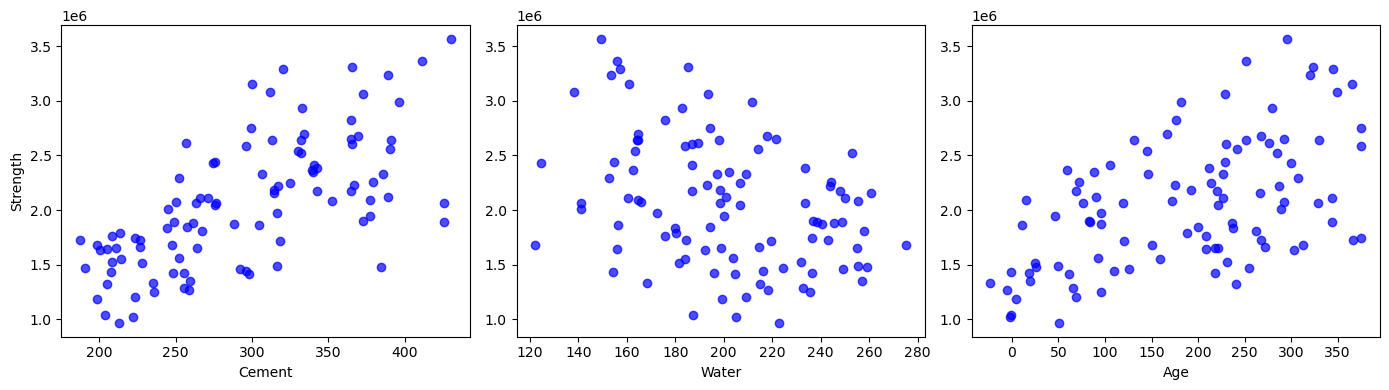

In [33]:
# load in Cement (C), Water (W) and Age (A) data for concrete
df=pd.read_csv('concrete_data.csv')
print(df.head())

# the Strength data will be our 'label' (more on this later)
y=df['Strength']
df=df.drop(columns=['Strength'])

# plot correlations between the raw data and strength
f,axs=plt.subplots(1,3,figsize=(14,4))
for ax,col in zip(axs, df.columns[:3]):
    ax.plot(df[col], y,'bo',alpha=0.7)
    ax.set_xlabel(col)
axs[0].set_ylabel('Strength')
plt.tight_layout()
plt.show()

In [35]:
from sklearn.preprocessing import PolynomialFeatures

# Create Polynomial Interaction Features with degree 2, e.g., C*A, W*C
poly = PolynomialFeatures(degree=2, interaction_only=True)
int_features = poly.fit_transform(df)

# get feature names and create a dataframe
feature_names = poly.get_feature_names_out(df.columns)
df_int = pd.DataFrame(int_features, columns=feature_names)
df_int.head()

,1,Cement,Water,Age,Cement Water,Cement Age,Water Age
0,1.0,275.819461,154.659010,229.311383,42657.964636,63248.541826,35465.071340
1,1.0,377.110854,200.097807,45.977792,75459.054908,17338.724562,9200.055420
2,1.0,389.277670,200.937993,89.879993,78220.673672,34988.274257,18060.305379
3,1.0,332.410077,197.915921,329.555620,65789.246757,109547.609191,65224.304259
4,1.0,190.700876,224.246703,254.312489,42764.042869,48497.614449,57028.737223


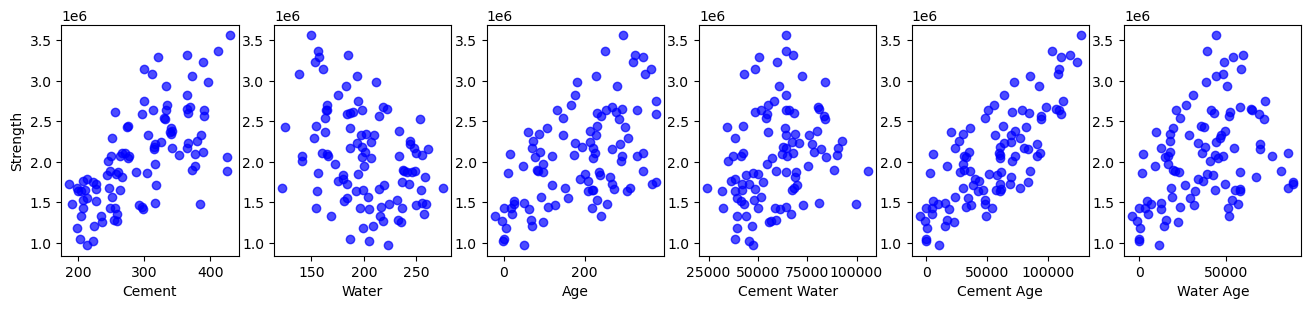

In [36]:
# plot the new interaction features and look for correlations
f,axs=plt.subplots(1,6,figsize=(16,3))
for ax,col in zip(axs, df_int.columns[-6:]):
    ax.plot(df_int[col], y, 'bo', alpha=0.7)
    ax.set_xlabel(col)
axs[0].set_ylabel('Strength')
plt.show()

In [37]:
# extend the dataframe with reciprocals, i.e., 1/A, 1/C, 1/W
df2 = pd.DataFrame(1./df.values, columns=[f'{col}^-1' for col in df.columns])
df3 = pd.concat([df,df2], axis=1)

# interaction features now also include ratios, e.g., C/W
poly = PolynomialFeatures(degree=2, interaction_only=True)
int_features = poly.fit_transform(df3)
feature_names = poly.get_feature_names(df3.columns)
df_int2 = pd.DataFrame(int_features, columns=feature_names)
df_int2.head()

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names'

In [ ]:
# plot the new interaction features and look for correlations
f,axs=plt.subplots(4,5,figsize=(16,10))
axs=[item for sublist in axs for item in sublist]
for ax,col in zip(axs, df_int2.columns[-20:]):
    ax.plot(df_int2[col], y,'bo',alpha=0.7,label=col)
    ax.legend()
plt.tight_layout()
plt.show()

### 2.5 Principal Component Analysis (PCA)

PCA is a statistical procedure that helps us work with **correlated** data or features. It converts variables that appear related to each other into new sets of uncorrelated variables called principal components. These components capture the **largest directions of variation** within the data.

In [ ]:
# load in Cement (C), Water (W) and Age (A) data for concrete
df=pd.read_csv('concrete_data.csv')
print(df.head())

# the Strength data will be our 'label' (more on this later)
y=df['Strength']
df=df.drop(columns=['Strength'])

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate predictors (X) and label (y)
X = df

# Standardize the predictors so they contribute equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)  # Reduce to 3 components
X_pca = pca.fit_transform(X_scaled)
weights = pca.components_

# Create a new dataframe with the PCA components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca = pd.concat([df,df_pca], axis=1)

# Print the principal component weights and variance
for i in range(3):
    w=weights[i,:]
    s=f'PC{i+1:d}='
    for j,c in enumerate(X.columns):
        s+=f'{w[j]:3.2f}*{c}+'
    print(s[:-1]+f',\tExplained variance={int(pca.explained_variance_ratio_[i]*100):d}%')

# plot the new principal components and look for correlations
f,axs=plt.subplots(1,6,figsize=(16,3))
for ax,col in zip(axs, df_pca.columns):
    ax.plot(df_pca[col], y, 'bo', alpha=0.7)
    ax.set_xlabel(col)
axs[0].set_ylabel('Strength')
plt.tight_layout()
plt.show()

## 3. Unsupervised Learning and Clustering

### 3.1 Clustering


In [ ]:
from encn404 import clustering
clustering()
# run this cell and answer the questions below:
# in step 0, how should we guess initially at the centroids?
# in step 1, how is cluster membership determined?
# in step 2, how is the new centroid position calculated?
# in step 3, how and why does cluster membership change?
# when does the algorithm stop?

### 3.2 K-Means

In [ ]:
from encn404 import kmeans
kmeans()
# run this cell and answer the questions below:
# In step 0, how many clusters are there? How do you "know" this answer?
# In step 1, there are two clusters. Which one has the better centroid? 
# Does the centroid location, relative to the data, tell us about how good the data are?
# In step 2, we have selected the right number of clusters. But how would an algorithm know this?
# What is the effect of increasing cluster number beyond what is required by the data?
# How is the Sihouette Score calculated? Ask an AI.
# How can we use the Silhouette Score to determine what the best number of clusters is for our data?

In [ ]:
# imports from sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# make up some data
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=42)

# create and fit the Kmeans object
kmns = KMeans(n_clusters=3, random_state=42)
kmns.fit(X)

# extract the key clustering outputs
centroids= kmns.cluster_centers_
membership = kmns.predict(X)
ss = silhouette_score(X, membership)
inertia = kmns.inertia_

# plot the clusters
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=membership, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmns.cluster_centers_[:, 0], kmns.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Cluster centers')
plt.title(f"KMeans Clustering (k=4), inertia={inertia:3.2f}"); plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.show()

### 3.3 DBSCAN

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# make clusters
X, y = make_blobs(n_samples=200, centers=2, cluster_std=1.5, random_state=42)

# add nosie
np.random.seed(42)
X = np.vstack([X, np.random.rand(50, 2) * 14 - 5])

# Apply DBSCAN algorithm
eps = 2.0
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y_dbscan = dbscan.fit_predict(X)

# Plot the clusters
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10, 4))
ax1.plot(X[:, 0], X[:, 1], 'o', color=[0.7,0.7,0.7], ms=7, mec='k')
unique_labels = np.unique(y_dbscan[y_dbscan != -1])
for label,c in zip(unique_labels,['y','m']):
    ax2.plot(X[y_dbscan == label, 0], X[y_dbscan == label, 1], c+'o', mec='k', ms=7, label=f"Cluster {label}")
ax2.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], color='gray', s=50, label="Noise")
ax2.set_title("DBSCAN Clustering")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.legend()
plt.tight_layout()
plt.show()

## 4. Hypothesis Testing

Work through the examples below during the lecture

### 4.1 T-test

In [ ]:
from scipy import stats
# Data: compressive strength measurements of two concrete types
concrete_type_A = [30, 32, 31, 33, 29, 28, 30, 31, 32, 30]
concrete_type_B = [35, 34, 33, 36, 32, 31, 33, 34, 35, 33]

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(concrete_type_A, concrete_type_B)

# Set significance level (alpha)
alpha = 0.05
if p_value < alpha: 
    print(p_value, 'different means')

### 4.2 Kendall's Rank Correlation

In [ ]:
# Data: stage and flow measurements on a river
stage = [1.2, 1.5, 1.8, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8]
flow = [11.0, 11.3, 12.0, 12.3, 18.0, 18.5, 19.8, 25.3, 28.3, 28.2]

# Calculate Kendall's tau and p-value
tau, p_value = stats.kendalltau(stage, flow)

# - A positive tau indicates a positive correlation (as stage height increases, river flow tends to increase).
# - The p-value tells us if the correlation is statistically significant.
tau, p_value = stats.kendalltau(stage[::3], flow[::3])
print(tau, p_value)

### 4.3 Mann-Whitney U test

In [ ]:
# Perform the Mann Whitney U test
statistic, p_value = stats.mannwhitneyu(concrete_type_A, concrete_type_B, alternative='two-sided')

# Set significance level (alpha)
alpha = 0.05
if p_value < alpha: 
    print('different medians')

# Predictive AI

## 5. Supervised Learning

In [ ]:
# imports and data definitions
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize     # find parameters that minimize the input
from functools import partial           # locks the first N inputs to the function to particular values
from sklearn.linear_model import LinearRegression     # multi-variate linear model
X=np.array([[1.87,6.66,0.78,8.34],[4.75,2.99,0.78,5.91]])
y=np.array([15.28,17.04,3.85,17.52])

### 5.1 Model 1A

In [ ]:
# extract the training set (three data points)
rain=X[0,:3]
runoff=y[:3]

# find the best-fitting linear model
    # define the loss function
def sum_of_squared_differences(feature, runoff, pars):
    m,c=pars
    return np.sum([(runoff_i-m*feature_i-c)**2 for runoff_i,feature_i in zip(runoff,feature)])
    # training
m_best, c_best=minimize(partial(sum_of_squared_differences, rain, runoff), [1,1]).x

# show the result
f,ax=plt.subplots(1,1,figsize=(6,3))
ax.plot(X[0,:], y, 'o', ms=5, color=[1., 0.5, 0.5], label='all')
ax.plot(X[0,:3], y[:3], 'o', ms=3, color=[0.2, 0.2, 0.8], label='train')
ax.plot([0,10], [c_best,m_best*10+c_best], ':', color=[0.2, 0.2, 0.8], label=f'y={m_best:3.2f}x+{c_best:3.2f}')
ax.set_xlim([0,10]);ax.set_xlabel('rain')
ax.set_ylim([0,25]);ax.set_ylabel('runoff')
ax.set_title(f'sum of squares = {sum_of_squared_differences(X[0,:], y, [m_best, c_best]):3.2f}')
ax.legend()
plt.show()

### 5.2 Model 1B

In [ ]:
# extract the training set (all data points)
rain=X[0,:]
runoff=y

# find the best-fitting linear model
    # use loss function defined above
    # training
m_best, c_best=minimize(partial(sum_of_squared_differences, rain, runoff), [1,1]).x

# show the result
f,ax=plt.subplots(1,1,figsize=(6,3))
ax.plot(X[0,:], y, 'o', ms=5, color=[1., 0.5, 0.5], label='all')
ax.plot(X[0,:], y[:], 'o', ms=3, color=[0.2, 0.2, 0.8], label='train')
ax.plot([0,10], [c_best,m_best*10+c_best], ':', color=[1, 0.5, 0.5], label=f'y={m_best:3.2f}x+{c_best:3.2f}')
ax.set_xlim([0,10]);ax.set_xlabel('rain')
ax.set_ylim([0,25]);ax.set_ylabel('runoff')
ax.set_title(f'sum of squares = {sum_of_squared_differences(X[0,:], y, [m_best, c_best]):3.2f}')
ax.legend()
plt.show()

### 5.3 Model 2A

In [ ]:
# extract the training set (three data points)
soil_condition=X[1,:3]
runoff=y[:3]

# find the best-fitting linear model
    # define the loss function
def sum_of_squared_differences(feature, runoff, pars):
    m,c=pars
    return np.sum([(runoff_i-m*feature_i-c)**2 for runoff_i,feature_i in zip(runoff,feature)])
    # training
m_best, c_best=minimize(partial(sum_of_squared_differences, soil_condition, runoff), [1,1]).x

# show the result
f,ax=plt.subplots(1,1,figsize=(6,3))
ax.plot(X[1,:], y, 'o', ms=5, color=[1., 0.5, 0.5], label='all')
ax.plot(X[1,:3], y[:3], 'o', ms=3, color=[0.2, 0.2, 0.8], label='train')
ax.plot([0,7], [c_best,m_best*7+c_best], ':', color=[0.2, 0.2, 0.8], label=f'y={m_best:3.2f}x+{c_best:3.2f}')
ax.set_xlim([0,7]);ax.set_xlabel('soil condition')
ax.set_ylim([0,25]);ax.set_ylabel('runoff')
ax.set_title(f'sum of squares = {sum_of_squared_differences(X[1,:], y, [m_best, c_best]):3.2f}')
ax.legend()
plt.show()

### 5.4 Model 2B

In [ ]:
# extract the training set (all data points)
soil_condition=X[1,:]
runoff=y

# find the best-fitting linear model
    # use loss function defined above
    # training
from scipy.optimize import minimize     # find parameters that minimize the input
from functools import partial           # locks the first N inputs to the function to particular values
m_best, c_best=minimize(partial(sum_of_squared_differences, soil_condition, runoff), [1,1]).x

# show the result
f,ax=plt.subplots(1,1,figsize=(6,3))
ax.plot(X[1,:], y, 'o', ms=5, color=[1., 0.5, 0.5], label='all')
ax.plot(X[1,:], y[:], 'o', ms=3, color=[0.2, 0.2, 0.8], label='train')
ax.plot([0,7], [c_best,m_best*7+c_best], ':', color=[1, 0.5, 0.5], label=f'y={m_best:3.2f}x+{c_best:3.2f}')
ax.set_xlim([0,7]);ax.set_xlabel('soil_condition')
ax.set_ylim([0,25]);ax.set_ylabel('runoff')
ax.set_title(f'sum of squares = {sum_of_squared_differences(X[1,:], y, [m_best, c_best]):3.2f}')
ax.legend()
plt.show()

### 5.5 Model 3

In [ ]:
# Create feature matrix and label vector for training set
X_train = X[:,:3].T
y_train = y[:3]

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Generate an out-of-sample point for prediction
X_test = np.array([[8.34, 5.91]])  # Test point with two features

# Make predictions
y_pred = model.predict(X_test)

# Plot the data points and the linear regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='Training data')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', label='Test prediction')

# Create a meshgrid for plotting the regression plane
x_grid, y_grid = np.meshgrid(np.linspace(0, 9, 50), np.linspace(0, 6, 50))
z_grid = model.predict(np.c_[x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, cmap='viridis')#, label='Linear regression plane')

ax.set_xlabel('rainfall')
ax.set_ylabel('soil condition')
ax.set_zlabel('runoff')
ax.set_title('Simple Linear Regression with Two Features')
ax.legend()
plt.show()

# Print the prediction result
print(f"Predicted value for X_test: {y_pred[0]:3.2f}. Sum of squares = {(y_pred[0]-y[-1])**2:3.2f}")

## 6. Learning Algorithms

In [ ]:
# imports
import pandas as pd
import numpy as np

### 6.1 Decision Trees

In [ ]:
# Consider the dataset below, describing seven bridges. For each, its load capacity, construction material and age is recorded.
# An assessment of the bridge's safety has also been included, as a binary variable.
data = [
    {"load_capacity": 30, "material_type": "Concrete", "age": 5, "safe": True},
    {"load_capacity": 60, "material_type": "Steel", "age": 15, "safe": True},
    {"load_capacity": 70, "material_type": "Concrete", "age": 25, "safe": False},
    {"load_capacity": 70, "material_type": "Steel", "age": 35, "safe": False},
    {"load_capacity": 50, "material_type": "Steel", "age": 8, "safe": True},
    {"load_capacity": 50, "material_type": "Concrete", "age": 10, "safe": False},
    {"load_capacity": 35, "material_type": "Steel", "age": 3, "safe": True}
]

df = pd.DataFrame(data)
print(df)

# We wish to develop a model that can predict whether a bridge is safe based on its load capacity, material and age.

In [ ]:
# For this problem, we will use a decision tree that splits the dataset into subsets.
# Run this cell to see how a dataframe is split into two subsets, according to a feature and value
feature='load_capacity'
split=50
print(df.loc[df[feature]<=split])
print(df.loc[df[feature]>split])

In [ ]:
from encn404 import decision_tree
# run this cell below, and then use the controls below to complete the tasks
decision_tree()

# TASK 1
# move the top slider to divide the dataset, trying both features
# try to separate the safe and unsafe bridges as much as possible
# when you are satisfied with the split of data, check the box to lock the root node

# TASK 2
# repeat the exercise for the lefthand and righthand sliders below
# further separate and subdivide the data, trying to distinguish the two binary classes
# can you construct a decision tree that classifies the two bridge types based on their features?

# Consider the original dataframe given in the cells above. Which part is the feature matrix X, and
# which is the label vector y?
# What are the parameters of this model? What are the hyperparameters?

# TASK 3
# Suppose you are given a new bridge: load_capacity of 45, steel, and 10 years old. What would your model predict?

In [ ]:
# here is an AI written demo of sklearn's Decision Tree
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset (you can replace this with your own dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

### 6.2 Neural Networks

In [ ]:
# Neural network prediction of runoff, based on current and previous rainfall
# note, all numbers have been normalized for convenience

# feature matrix
# columns: current rainfall, previous hour rainfall, previous runoff
X = np.array([[0,0,1],        # rainfall has stopped, some runoff remains
            [0,1,1],          # **describe**
            [1,1,0],          # **describe**
            [1,1,1]])         # **describe**

# label vector: amount of current runoff
y = np.array([[0.1],
              [0.6],
              [0.4],
              [1.0]])

# prediction: what will be the runoff for these features?
predict=np.array([[0.5, 0.3, 0.8],])

# run the cell below and then complete the tasks
from encn404 import neural_network
neural_network(X,y,predict)

# TASK 0: model setup
# consider the partial description of the feature matrix above, and complete the remaining rows
# turn on the labels and read the descriptions of the model parts
# each connector is an activation function - its color and thickness denote its weight (red=positive, blue=negative)

# TASK 1: model training
# (turn on labels if you are not sure what you are looking at)
# how does the number of circles in the input layer reflect the input data?
# is the number of circles in the hidden layer a parameter or a hyperparameter?

# the model is initalized with random weights - use the slider to start training it
# how does total error change as the number of training steps is increased?
# how do the weights change during training?

# use the slider to visualize a datapoint (a row of the feature matrix)
# how does training improve the model prediction and the true label?

# TASK 2: model prediction
# which feature has the greatest total weight of connectors leaving it?
# turn the prediction - does the answer make sense? Try a different prediction.

# EXTRA:
# make some changes to input features or labels and see how things change.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with two predictors (X1 and X2)
np.random.seed(42)
n_samples = 100
X1 = np.random.rand(n_samples, 1)
X2 = np.random.rand(n_samples, 1)
y = X1**3 + 2 * X2**2 + 3 * X1 * X2 + np.random.randn(n_samples, 1) * 2

# Combine X1 and X2 into a single feature matrix
X = np.hstack((X1, X2))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TASK
# play with the hidden_layer_sizes, e.g., (10,10,10), max_iter (e.g., 10000), and other parameters
# to see if you can improve the model fit.
# Create an MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Visualize the predictions (you can modify this part as needed)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, model.predict(X_train), color='r', alpha=0.7, label='in-sample')
plt.scatter(y_test, y_pred, color='b', alpha=0.7, label='out-of-sample')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Cubic Function Regression with Neural Network")
plt.legend()
plt.show()


## 7. Performance Metrics

In [ ]:
# imports
import pandas as pd

### 7.1 Classification models

Consider a classification problem where we are trying to predict whether a site will be contaminated based on environmental indicators.

'contamination'= 1 denotes a contaminated site.

In [ ]:
# import and summarize the environmental data (last column is target/label)
df=pd.read_csv('enviro_data.csv')
print(df.shape)
df.head()

We'll use a RandomForest model to fit these data and try solve the classification problem.
- A random forest comprises lots of decision trees.
- The number of trees in the forest is a hyperparameter.
- The model output is a number between 0 and 1.
- We convert the output to a binary prediction by comparing against a threshold value. 

In [ ]:
# run this cell and answer the questions below
from encn404 import roc
roc()

# TASK 1
# for the default settings, referring to the confusion matrix:
# - how many contaminated sites are in the dataset?
# - how many contaminated sites are predicted by the model?
# - what is the "rate" of correct model predictions?

# TASK 2
# change the slider so the threshold to predict contamination is lower
# - which column gains more counts?
# - does the sum across a row change? why/why not?
# - which square in the conf. matrix is for false positives?
# - increase the threshold to minimize false positives - what is the tradeoff?

# TASK 3
# change the number of trees
# - how does hyperparameter selection affect model performance?

### 7.2 Regression models

Consider a regression problem where we are trying to fit the structural integrity score, $SI$, of a general building using a multivariate linear regression to several of its features, $X_i$.

$$ SI = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \epsilon $$

where the coefficients $\beta_i$ are determined during model training and $\epsilon$ is the remaining error (called the residual).

The exercise below consider six possible features.

In [ ]:
# run this cell and answer the questions below
from encn404 import regression_performance
regression_performance()

# TASK 1
# inspect the output (without adjusting any of the checkboxes):
# - what are six ways to evaluate how good a regression model is?
# - does each measure give the same information about model performance?

# TASK 2
# use checkboxes to turn off just one feature
# - does error increase or decrease when features are dropped?
# - does each feature, when dropped, cause the same error change?
# - could you use this behaviour to decide which features are most important?
# - what appears to be the most important feature?

# TASK 3
# use checkboxes to turn off two features
# - is the change in error additive? e.g., is the change in R-squared from 
# dropping two features the sum of the changes when those features are dropped 
# individually?

# TASK 4
# turn off checkboxes until only one feature remains
# - what is the single most important feature in this model?

## 8. Cross Validation

In [ ]:
# imports
import pandas as pd

In this exercise, we'll look at some eye tracking data of the kind that might be analysed in a VR research study. In this case, the dataset records whether a subject's eyes are open or closed (the binary target). The features for prediction are continuous recordings from a set of 14 electrodes placed on the subject's head.

In [ ]:
# import and summarize the environmental data (last column is target/label)
df=pd.read_csv('eye_movement.csv')
print(df.shape)
df.head()

The exercise below considers issues of **train-test split, hyperparameter tuning, and overfitting**, as they apply to this classification problem.

In [ ]:
# run this cell and answer the questions below
from encn404 import cross_validation
cross_validation()

# TASK 1
# inspect the output (without adjusting anything):
# - what is the black line, and what does it mean when it switches back and forth?
# - what are the blue and red lines?
# - what do the two errors in the legend refer to?

# TASK 2 - train-test split
# slide the Training Data slider back and forth
# - what is changing in terms of model input and predictions?
# - is the error changing?

# TASK 3 - hyperparameter tuning
# slide the Max Depth slider so that trees can have more and more branches
# - how does the fit between the blue and black line change?
# - how does the error improve?

# TASK 4 - overfitting
# slide Max Depth to its largest value
# - is this model good at fitting the data? does it have a low error?
# - is this model any good at making predictions?

# Generative AI

For the exercises below, you will need access to a Generative AI. The goal is to prompt the AI to produce working Python code that meets your specified requirements. In all likelihood, you will still need to do debugging. You should also recognize that there is a risk that you won't fully understand how a code works and what its limitations are.

Nevertheless, let's dive in.

## 9. Data Analysis

Suppose we have a csv file. We're curious about its contents and want an AI to make it as easy as possible to discover what's in there. 

The prompts below take a two step approach. First, we'll ask the AI to write an explorative Python script. Its goal is simply to read the file and report back what is inside it. Then, we'll ask it to write a second script that performs a detailed analysis, using the output that has been reported by the first script.

**Prompt 1**: Copy this into [Bing Copilot](https://www.bing.com/chat?q=Bing+AI&FORM=hpcodx) and then paste the code the AI gives you into the cell below. Run it by hitting Ctrl+Enter

> "Can you write me a python script to investigate the contents of enviro_data.csv file and print a summary? The summary should include the file name and other helpful information for a second prompt that will plan in more detail a python script to analyse the file"

**Prompt 2**: Copy this into [Bing Copilot](https://www.bing.com/chat?q=Bing+AI&FORM=hpcodx) AND the printed output of the first code. Paste the code the AI gives you into the cell below. Run it by hitting Ctrl+Enter

> "Can you write me a Python script to do a detailed analysis of a csv file. I will paste a summary of the csv file at the end of this prompt. Your script should provide a comprehensive visual summary, including multiple plots and summarizing information that might be helpful for the task of data exploration. The summary of the dataset follows: \*paste output from the previous code here\*"

**What to do if the code doesn't run and you get an error?**: Copy-paste the error straight back into the AI and hand off the problem. Prompt with something like 

>"How do I fix this? \*pasted error message\*"

In [ ]:
# copy-paste Python code into this cell and run by hitting Ctrl+Enter

## 10. Software Engineering

At the risk of simplifying an enormous field, software engineers who produce good code do three things well: understand **requirements**, translate these to code **specifications**, and put their code through **testing**. 

**Requirements**: This is the stage where the needs or conditions to meet for a new or altered product are gathered. The goal is to clearly understand what the stakeholders need, which involves communication and collaboration.

> For AI-coding, you are the stakeholder. What do you need? What is your goal? Prepare to write this down.

**Specification**: Once the requirements are understood, they are translated into a detailed document that describes the software to be written. Specifications act as a blueprint for the development process, outlining features, functionalities, and constraints.

> For AI-coding, you might also take charge of this step. What should the code accept as inputs? What should it return as outputs?

**Testing**: This is the process of evaluating the software to ensure it meets the specified requirements and is free of defects. Testing can be done in various forms, including unit testing, integration testing, system testing, and acceptance testing.

> Let's pass this one off to the AI.

Pass the prompt below into [Bing Copilot](https://www.bing.com/chat?q=Bing+AI&FORM=hpcodx), and then copy-paste its code into the box below.

> I want to sort a list of numbers. Please write me Python code that accepts an unsorted list, applies the heap sort algorithm, and returns the sorted list and corresponding indices. Please also write code that tests the function is operating correctly.

In [ ]:
# copy-paste Python code into this cell and run by hitting Ctrl+Enter

## Other

In [ ]:
# Generate some sample time series data
np.random.seed(16)
ts = np.concatenate([np.random.randn(150)*si for si in [1.3, 2.4, 0.7, 1.9, 1.3]])

fs = np.concatenate([np.sin(np.linspace(0,2*np.pi*150,150)/ti)*ai for ti,ai in zip([10, 30, 50, 15, 25],[0.1,0.5,0.3,0.8,0.2])])
ts = np.cumsum(ts)+35+fs*10
print(np.mean(fs), np.std(fs))

ts = pd.Series(ts, index=pd.date_range('1/1/2000', periods=len(ts)))

In [ ]:
# generate some correlated data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)

# Number of data points
n = 100

# Generate random data for cement, water, and age
cement = np.random.uniform(200, 400, n)
water = np.random.uniform(150, 250, n)
age = np.random.uniform(1, 365, n)

# Calculate cement-to-water ratio
cement_water_ratio = cement / water

# Generate synthetic strength data correlated with cement-age product and cement-to-water ratio
strength = 10 * (cement * age) + 100.e4 * cement_water_ratio #+ np.random.normal(0, 5, n)

# Create a DataFrame
df = pd.DataFrame({
    'Cement': cement,
    'Water': water,
    'Age': age,
    'Strength': strength
})

# Add some noise to individual inputs
df['Cement'] += np.random.normal(0, 20, n)
df['Water'] += np.random.normal(0, 20, n)
df['Age'] += np.random.normal(0, 20, n)

# df.to_csv('concrete_data.csv', index=False)